<a href="https://colab.research.google.com/github/derkmed/COMSE6998_025_Project/blob/main/pydrive_get_video_file_player_urls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab allows a user to extract all video files in a specified Google Drive.
The videos are returned as video player links for easy viewing.

In [ ]:
# This should be the Public Google Drive Folder ID that contains all workout videos.
GOOGLE_DRIVE_WORKOUT_ID = '1U7FYKeoD669CtNtN64PBI4-tPkTlW05p' #@param {type: 'string'}

In [ ]:
from dataclasses import dataclass
from google.auth import default
from google.colab import auth
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import random
from typing import *

In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()


#@title Set up Sheets Authentication
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
drive = GoogleDrive(gauth)
workout_folder_ids = {}
for file in drive.ListFile({'q': f"'{GOOGLE_DRIVE_WORKOUT_ID}' in parents",}).GetList():
    if file['title'] != "archive" and file['title'] != ".DS_Store":
      print('title {}, id {}'.format(file['title'], file['id']))
      workout_folder_ids[file['title']] = file['id']
print(f"{len(workout_folder_ids.keys())} workout types found")

title russian twist, id 1qOHaHj5S1mbbSlFkPgGAXo1LBS4zcxSx
title romanian deadlift, id 1zVlLga5ACkicT6LglbzkmlgdSvs0mDE5
title hip thrust, id 1RxdAN-9ydzPpT02g53GSVX8xHwMdm1hn
title shoulder press, id 1lLWuVjAYiZyzmXy3gq75NwE4URl91wgs
title pull Up, id 1bfQluf50neeBei_JvZL64Zq69d2o0r7g
title plank, id 1LkbIvJvlQZliRPpPIdKnT4_RYl7Z1bJA
title bench press, id 13SbUgXnglw6syYywfnI-kwuXE3vqx82O
title decline bench press, id 1x_Q6br5hrslDXO4TCbooo313-UixcUxp
title leg raises, id 1qtduCup5jyayWO3zWwGGJv0YSbJkAyf9
title lateral raise, id 1Z6MiSUsCr7ZW4QmIb8LLMzTMABk1eBLZ
title leg extension, id 10SwcRU9HkzAZZuy-usKUmPQYdu_zDFr4
title t bar row, id 1Bww-S0NTE2FYrhi0lrf-dUozFxN7Rzqu
title incline bench press, id 1yh2V89BPzg735DcV7r-LIhxPwwIlQigJ
title deadlift, id 11tF2CPVp_z_20ifsiiE9_oCjzcwLuk99
title chest fly machine, id 1bYtOce16YFf1o4dGgeMClNsFJeDtbHtZ
title tricep Pushdown, id 1ScY9hAOaFYGBjPSGzyQwFY34_f4v5VLW
title barbell biceps curl, id 1msW4xUpSvubKWZnajnJuxQv0ix8hAISE
title squat, id 

In [ ]:
def get_video_link(id: str) -> str:
  '''
  Parses the Google Drive Link given a folder ID.
  '''
  return f"https://drive.google.com/file/d/{id}/view?usp=drive_link"


def get_video_links(drive_folder_ids: Dict[str, str]) -> Dict[str, str]:
  '''
  Returns a dictionary of files contained within a set of Drive folders mapped to their
  video player IDs. ASSUMES that all contained files are of video formats.
  '''
  video_links = {
      'video_type': [],
      'video_title': [],
      'video_link': [],
      }
  for workout_type, id in drive_folder_ids.items():
    for file in drive.ListFile({'q': f"'{id}' in parents",}).GetList():
      video_title, video_link =  file['title'], get_video_link(file['id'])
      video_links['video_type'].append(workout_type)
      video_links['video_title'].append(video_title)
      video_links['video_link'].append(video_link)
  return video_links


video_links = get_video_links(workout_folder_ids)
video_links_df = pd.DataFrame.from_dict(video_links)
print(f"There are {len(video_links_df)} videos in total")

video_links_df

# Used to randomly derive the instruction family examples.
# inst_family_examples_df = video_links_df[['video_title', 'video_link']].sample(21)
# gsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1cLqHKOCwNuqJ_e2lH0cdKnI8oi-u3lTsPHdL0dGRcyk/edit#gid=1916776205")
# inst_family_examples_sheet = gsheet.worksheet('Sheet8')
# set_with_dataframe(inst_family_examples_sheet, inst_family_examples_df)

There are 652 videos in total


,video_type,video_title,video_link
0,russian twist,russian twist_6.mp4,https://drive.google.com/file/d/1cEw7k59cner0Q...
1,russian twist,russian twist_9.mp4,https://drive.google.com/file/d/1gi2aTugNsNQek...
2,russian twist,russian twist_8.mp4,https://drive.google.com/file/d/1ujpQwzhnIbUXB...
3,russian twist,russian twist_7.mp4,https://drive.google.com/file/d/1uEoCtTICmj59y...
4,russian twist,russian twist_12.mp4,https://drive.google.com/file/d/1oUR7zITE9YQnF...
...,...,...,...
647,tricep dips,tricep dips_15.mp4,https://drive.google.com/file/d/1XfnWtLh2sMKWR...
648,tricep dips,tricep dips_10.mp4,https://drive.google.com/file/d/1c6hEbEnxkt8pp...
649,tricep dips,tricep dips_11.mp4,https://drive.google.com/file/d/1BPiumfNafNrvi...
650,tricep dips,tricep dips_12.mp4,https://drive.google.com/file/d/10FdgDaBt64Ws7...


In [ ]:
IN_SHEET_URL = "https://docs.google.com/spreadsheets/d/1cLqHKOCwNuqJ_e2lH0cdKnI8oi-u3lTsPHdL0dGRcyk/edit#gid=432858150" #@param {type: "string"}
EXAMPLES_SHEET_NAME = "round1_annotation_examples" #@param (type: "string")

OUT_SHEET_URL = "https://docs.google.com/spreadsheets/d/1Cw9sxAsZyTVq9Ay8iePcZseGuTrbhrBTWRkfYFPMyHI/edit#gid=0" #@param {type: "string"}
RD1_SHEET_NAME = "round1_annotation" #@param (type: "string")

ANNOTATORS = [
    "da2985",
    "maa2375",
    "vb2559",
    "mh4039",
    "ek2935",
    "jn2808",
    "ko2541",
    "sd3592"
]
N_ANNOTATORS = len(ANNOTATORS)
print(f"There are {N_ANNOTATORS} annotators")

in_sheet = gc.open_by_url(IN_SHEET_URL)
examples_sheet_data = in_sheet.worksheet(EXAMPLES_SHEET_NAME).get_all_values()
examples_df = pd.DataFrame(examples_sheet_data[1:], columns=examples_sheet_data[0])
examples_df

There are 8 annotators


,Video Example,Instruction Family,Instruction Family Description,Seed Instruction,Seed Answer
0,https://drive.google.com/file/d/1mxPv8NBMNuv68...,Alternatives,Create a visual instruction asking about simil...,Can this workout be done without any equipment?,No. It requires a cable machine.
1,https://drive.google.com/file/d/1hkPue4OWbmmWa...,Accesibility,Create a visual instruction regarding the acce...,Can someone who relies on a wheelchair perform...,"If the user can safely lie down on a bench, th..."
2,https://drive.google.com/file/d/1qpmRJQ83Ndxjv...,Anatomy,Create a visual instruction related to human a...,Is the person using their hands to perform the...,"Yes, the individual in the video is using both..."
3,https://drive.google.com/file/d/1_St8s3OImo1Do...,Answer-Eliciting,Create a visual instruction that elicits some ...,Write a question in which the answer is 'chest...,What is the name of the machine that appears i...
4,https://drive.google.com/file/d/1qpmRJQ83Ndxjv...,Background,Create a visual instruction about the backgrou...,Describe the environment required for this exe...,An individual should have lots of space to pla...
5,https://drive.google.com/file/d/1IYB7SrYtSWp1j...,Counting,Create a visual instruction to count some # of...,How many repetitions are done?,The person performs three repetitions.
6,https://drive.google.com/file/d/1d7J15nWaHRE1Z...,Difficulty,Create a visual instruction about the level of...,Which individuals will find this exercise diff...,"If the beginner has weak shoulders, triceps, a..."
7,https://drive.google.com/file/d/11ePReT7yDj9n3...,Equipment,Create a visual instruction about the exercise...,What equipment is necessary for this exercise?,A barbell is required for this exercise.
8,https://drive.google.com/file/d/1mnThFgoVbqB8i...,Excercise,Create a visual instruction about the exercise...,What is the name of the exercise that this ind...,He is doing a decline bench press.
9,https://drive.google.com/file/d/18i4_s95SxBBdD...,Form,Create a visual instruction about maintaining ...,How far apart should the hand be from the shou...,Close-grip push-ups target muscle groups like ...


In [ ]:
video_type_sample_df = video_links_df.groupby(['video_type'])\
  .sample(N_ANNOTATORS, replace=True)

#@title Cross-Join Examples with Each Video
video_type_sample_df['tmp'] = 0
examples_df['tmp'] = 0
crossed_df = video_type_sample_df.merge(examples_df, on='tmp', how='outer')
crossed_df = crossed_df.drop(columns=['tmp'])
print(f"There are {len(crossed_df)} parings")

There are 2816 parings


In [ ]:
sample_df = crossed_df.groupby(['video_type', 'Instruction Family'])\
  .sample(int(N_ANNOTATORS/4), replace=False)
sample_df
print(f"Sampled down to {len(sample_df)} parings")

Sampled down to 704 parings


<Axes: xlabel='Instruction Family'>

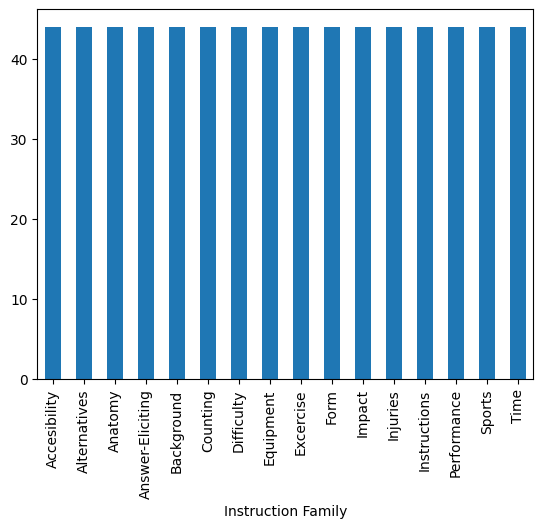

In [171]:
sample_df.groupby('video_type').size().plot(kind = 'bar')

<Axes: xlabel='Instruction Family'>

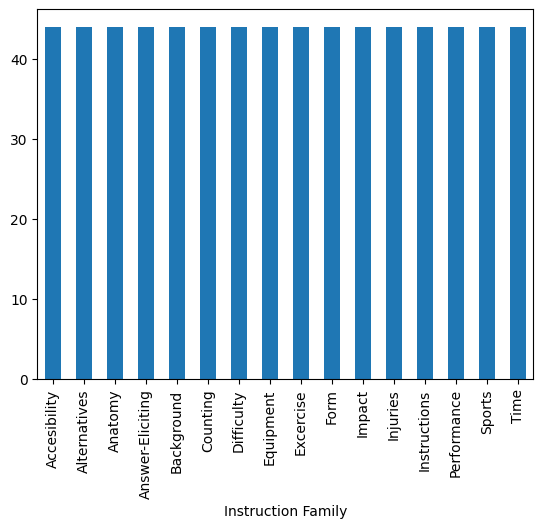

In [ ]:
sample_df.groupby('Instruction Family').size().plot(kind = 'bar')

In [ ]:
sample_df

,video_type,video_title,video_link,Video Example,Instruction Family,Instruction Family Description,Seed Instruction,Seed Answer
17,barbell biceps curl,barbell biceps curl_16.mp4,https://drive.google.com/file/d/1r5aoYZfUs_uBP...,https://drive.google.com/file/d/1hkPue4OWbmmWa...,Accesibility,Create a visual instruction regarding the acce...,Can someone who relies on a wheelchair perform...,"If the user can safely lie down on a bench, th..."
81,barbell biceps curl,barbell biceps curl_12.mp4,https://drive.google.com/file/d/1o10v6TuKCnE2R...,https://drive.google.com/file/d/1hkPue4OWbmmWa...,Accesibility,Create a visual instruction regarding the acce...,Can someone who relies on a wheelchair perform...,"If the user can safely lie down on a bench, th..."
16,barbell biceps curl,barbell biceps curl_16.mp4,https://drive.google.com/file/d/1r5aoYZfUs_uBP...,https://drive.google.com/file/d/1mxPv8NBMNuv68...,Alternatives,Create a visual instruction asking about simil...,Can this workout be done without any equipment?,No. It requires a cable machine.
48,barbell biceps curl,barbell biceps curl_49.mp4,https://drive.google.com/file/d/1ALSA8Z8PZHNZI...,https://drive.google.com/file/d/1mxPv8NBMNuv68...,Alternatives,Create a visual instruction asking about simil...,Can this workout be done without any equipment?,No. It requires a cable machine.
82,barbell biceps curl,barbell biceps curl_12.mp4,https://drive.google.com/file/d/1o10v6TuKCnE2R...,https://drive.google.com/file/d/1qpmRJQ83Ndxjv...,Anatomy,Create a visual instruction related to human a...,Is the person using their hands to perform the...,"Yes, the individual in the video is using both..."
...,...,...,...,...,...,...,...,...
2813,tricep dips,tricep dips_19.mp4,https://drive.google.com/file/d/1GQdpUgvoIWq53...,https://drive.google.com/file/d/1PssvP3y_ere5D...,Performance,Create a visual instruction regarding the perf...,Will this workout help in building stronger le...,"No, this workout does not primarily target leg..."
2798,tricep dips,tricep dips_2.MOV,https://drive.google.com/file/d/1bGw9ViZx8-3-f...,https://drive.google.com/file/d/1AM0YFwG7CxKvq...,Sports,Create a visual instruction about sports that ...,What sports would this exercise be helpful for?,Individuals that perform sports that require u...
2734,tricep dips,tricep dips_7.mp4,https://drive.google.com/file/d/1-DEHdCKHLtLbZ...,https://drive.google.com/file/d/1AM0YFwG7CxKvq...,Sports,Create a visual instruction about sports that ...,What sports would this exercise be helpful for?,Individuals that perform sports that require u...
2751,tricep dips,tricep dips_11.mp4,https://drive.google.com/file/d/1BPiumfNafNrvi...,https://drive.google.com/file/d/1peZNdFcwev8tM...,Time,Create a visual instruction related to the tim...,About how many seconds does the person hold th...,The person should pause at the top of the dead...


In [ ]:
out_sheet = gc.open_by_url(OUT_SHEET_URL)
out_wksht = out_sheet.worksheet('Sheet1')
set_with_dataframe(out_wksht, sample_df)